# COSC 437 Data Mining - Lab Assignment 1 - Exploratory Data Analysis in Python

In this lab assignment, you are going to use Python and packages to process fictional data on university students grades. 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First, load the data from the file student_grades.csv. It will be easier to load it as a pandas DataFrame.

In [38]:
# TODO: 
data_path = "students_grades.csv"  
data = pd.read_csv(data_path)

Now, take a look at the data and understand how the data look like:

In [39]:
# TODO: 
print("Data Information:")
print(data.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student Number  571 non-null    int64  
 1   PH-121          571 non-null    float64
 2   HS-101          571 non-null    float64
 3   CY-105          570 non-null    float64
 4   HS-105/12       570 non-null    float64
 5   MT-111          569 non-null    float64
 6   CS-105          571 non-null    float64
 7   CS-106          569 non-null    float64
 8   EL-102          569 non-null    float64
 9   EE-119          569 non-null    float64
 10  ME-107          569 non-null    float64
 11  CS-107          569 non-null    float64
 12  HS-205/20       566 non-null    float64
 13  MT-222          566 non-null    float64
 14  EE-222          564 non-null    float64
 15  MT-224          564 non-null    float64
 16  CS-210          564 non-null    float64
 17  CS-211          5

Answer the question: How many courses are there and how many students are recorded?

In [40]:
# Write your answer below:
n_students = data.shape[0]
n_courses = data.shape[1] - 1 # Subtract 1 because the first column is the student ID

# Print the results
print(f"Number of students: {n_students}")
print(f"Number of courses: {n_courses}")

print(f"There are {n_students} students and {n_courses} courses in the data set.")

Number of students: 571
Number of courses: 41
There are 571 students and 41 courses in the data set.


In this data set, some cells have empty value. For example, take a look at row 44:

In [41]:
# TODO: 
row44 = data.iloc[43]
print(row44)  # Print the row 

missing_values = row44.isnull().sum()
print(f"No. of missing values in row 44: {missing_values}")


Student Number    97044.00
PH-121               21.79
HS-101               71.95
CY-105               25.13
HS-105/12            71.25
MT-111               40.56
CS-105               83.33
CS-106               66.75
EL-102               54.04
EE-119               88.16
ME-107               93.06
CS-107               36.44
HS-205/20            79.48
MT-222                9.48
EE-222               74.60
MT-224               14.35
CS-210               81.33
CS-211               16.44
CS-203               70.06
CS-214               35.57
EE-217                8.18
CS-212               61.96
CS-215               53.87
MT-331               72.89
EF-303               51.16
HS-304               82.60
CS-301               47.50
CS-302               76.92
TC-383               39.68
MT-442               77.65
EL-332               57.92
CS-318               68.54
CS-306               75.30
CS-312               65.79
CS-317               74.48
CS-403               54.33
CS-421               38.07
C

We should set all the empty values to 0. While it's doable in for-loops. There are more efficient ways to do so.

In [42]:
# TODO: 
data.fillna(0, inplace=True)

print("data after filling missing values with 0:")
print(data.isnull().sum().sum())   

data after filling missing values with 0:
0


Now let's take another look at row 44:

In [43]:
# TODO: 
row44 = data.iloc[43]
print(row44)  # Print the row 

missing_values = row44.isnull().sum()
print(f"No. of missing values in row 44: {missing_values}")


Student Number    97044.00
PH-121               21.79
HS-101               71.95
CY-105               25.13
HS-105/12            71.25
MT-111               40.56
CS-105               83.33
CS-106               66.75
EL-102               54.04
EE-119               88.16
ME-107               93.06
CS-107               36.44
HS-205/20            79.48
MT-222                9.48
EE-222               74.60
MT-224               14.35
CS-210               81.33
CS-211               16.44
CS-203               70.06
CS-214               35.57
EE-217                8.18
CS-212               61.96
CS-215               53.87
MT-331               72.89
EF-303               51.16
HS-304               82.60
CS-301               47.50
CS-302               76.92
TC-383               39.68
MT-442               77.65
EL-332               57.92
CS-318               68.54
CS-306               75.30
CS-312               65.79
CS-317               74.48
CS-403               54.33
CS-421               38.07
C

Choose an appropriate visualization method, show how students are performing (the distribution) in the course CS-105.

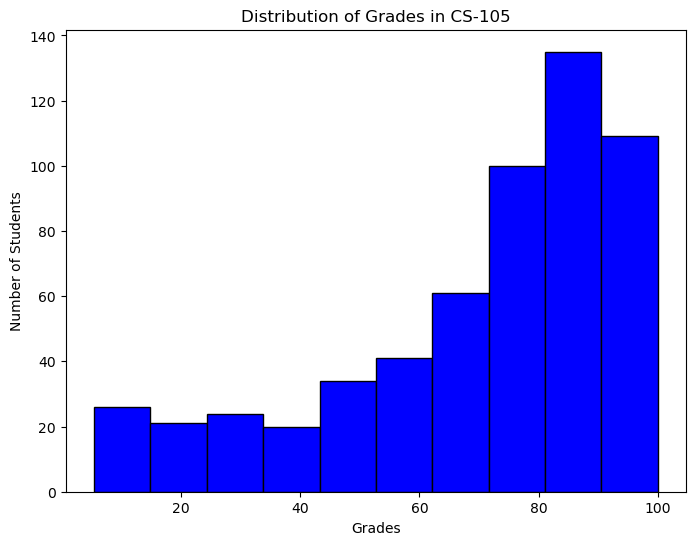

In [44]:
# TODO: 
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data['CS-105'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Grades in CS-105')
plt.xlabel('Grades')
plt.ylabel('Number of Students')
plt.show()

Choose an appropriate visualization method, show how students are performing in the three courses CS-105, CS-106, and EE-119.

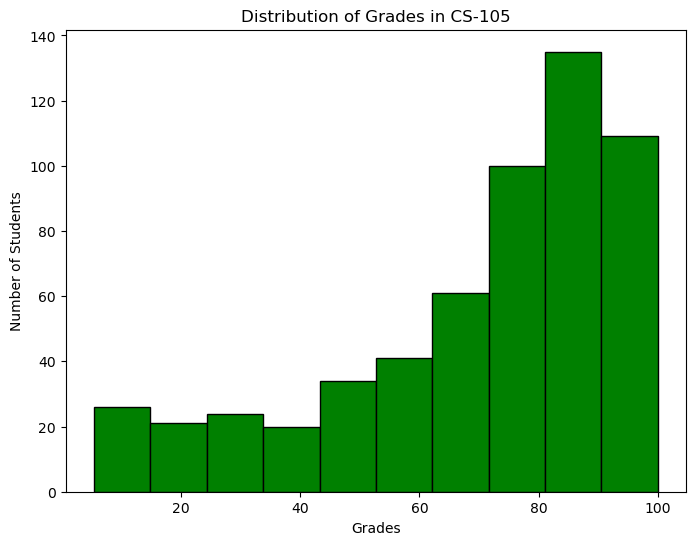

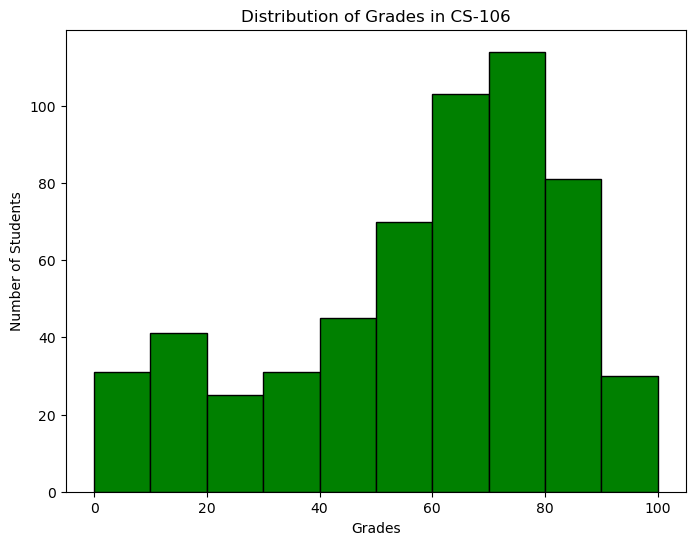

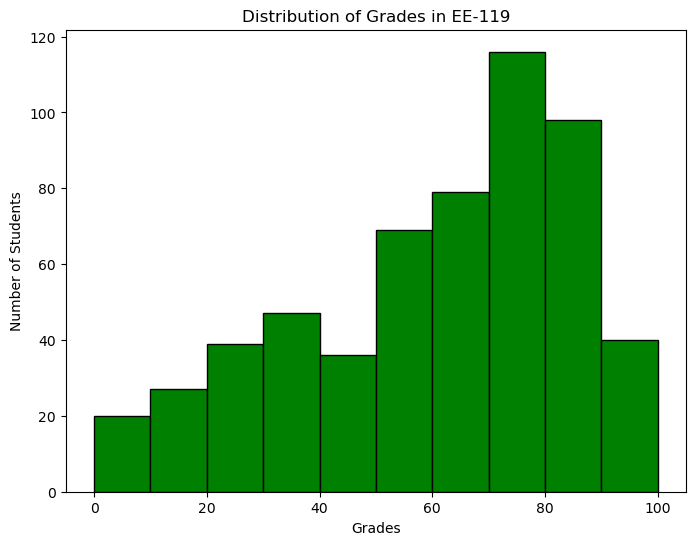

In [45]:
# TODO
courses = ['CS-105', 'CS-106', 'EE-119']  # Corrected column name

for course in courses:
        plt.figure(figsize=(8, 6))
        plt.hist(data[course], bins=10, color='green', edgecolor='black')
        plt.title(f'Distribution of Grades in {course}')
        plt.xlabel('Grades')
        plt.ylabel('Number of Students')
        plt.show()

Choose an appropriate visualization method, show how students performance are related in CS-105 and CS-106.

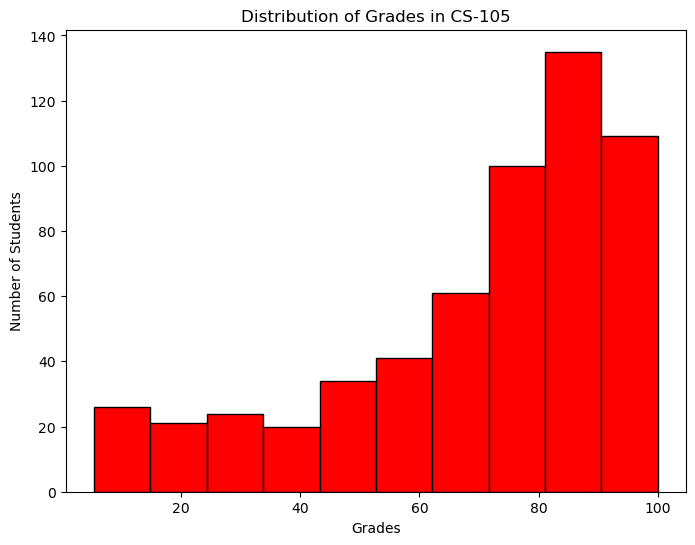

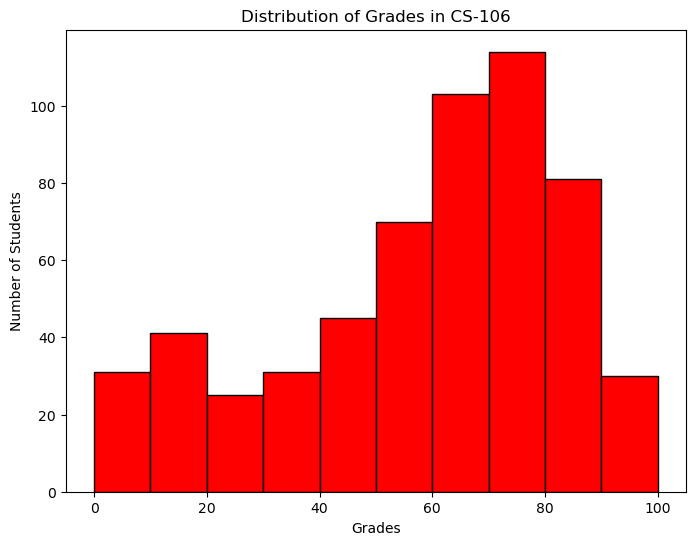

In [46]:
# TODO: 
courses = ['CS-105', 'CS-106'] 

for course in courses:
    plt.figure(figsize=(8, 6))
    plt.hist(data[course], bins=10, color='red', edgecolor='black')
    plt.title(f'Distribution of Grades in {course}')
    plt.xlabel('Grades')
    plt.ylabel('Number of Students')
    plt.show()
    

Since this data set contains purely numeric values, it is easy to work in numpy. Generate a numpy 2d array from the DataFrame. Notice that the first column is actually the student id. We are going to exclude it from our array.

In [47]:
# TODO: 
grades_array = data.iloc[:, 1:].to_numpy()
print("NumPy Array:")
print(grades_array)

NumPy Array:
[[45.88 12.92 22.46 ... 22.61 64.47 75.35]
 [92.53  7.57 11.81 ... 32.86 31.75 64.66]
 [91.37 61.05 91.05 ... 86.47 82.34 94.12]
 ...
 [59.12 86.46 76.54 ... 72.65 75.63 82.12]
 [88.01 70.58 10.3  ... 56.48 46.47 32.01]
 [29.37 13.29  8.07 ... 67.21 12.23 21.63]]


What is the data type of the elements in the array? Change the data type if appropriate.

In [48]:
# TODO: 
print("data type of array is: ", grades_array.dtype)

grades_arrary = grades_array.astype('float64')
print("data type after converting:", grades_array.dtype)


data type of array is:  float64
data type after converting: float64


What is the average grade for every course?

In [49]:
# TODO: 
average_grades = grades_array.mean(axis=0)
print("Average Grades:")
print(average_grades)


Average Grades:
[61.18210158 48.96082312 68.62977233 57.28835377 59.9338704  69.96323993
 58.45395797 59.51187391 60.20359019 51.54542907 58.71166375 67.61434326
 51.64103327 63.78823117 56.39661996 63.00809107 50.82050788 55.16994746
 48.8621366  63.61847636 53.45350263 51.70350263 61.50647986 45.02208406
 53.61255692 56.05681261 61.69530648 56.43397548 66.97395797 56.71084063
 50.12124343 57.34225919 58.69504378 50.08176883 62.2514711  44.62014011
 57.77695271 71.34087566 59.00535902 57.68458844 57.9345359 ]


Suppose that the grade point average (GPA) is calculated as a weighted average of all courses taken over the four years (in a scale of 100), and the weights are represented in an array. Define a method that calculate the GPA. Your method should work for multiple data entries:

In [50]:
course_weights = np.array([1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4])

# Implement your method 
def calc_gpa(grades, course_weights):
    total_weighted_grades = np.sum(grades * course_weights, axis=1)
    total_weights = np.sum(course_weights)
    gpa = total_weighted_grades / total_weights
    return gpa

#test:
gpa = calc_gpa(grades_array, course_weights)
print("GPA:")
print(gpa)


GPA:
[39.44597938 31.06876289 78.12701031 28.57608247 71.1342268  60.3114433
 58.09237113 60.99721649 69.64597938 66.99701031 49.58226804 67.43329897
 51.82154639 77.47938144 74.67453608 52.12608247 65.94752577 22.46618557
 75.04123711 74.25391753 37.3557732  58.59793814 57.73680412 76.28639175
 74.09237113 37.29793814 70.34402062 34.79896907 64.88649485 38.23701031
 72.57340206 59.78896907 65.11804124 62.86783505 64.57195876 58.49628866
 61.48618557 67.66020619 36.44556701 78.50020619 60.39134021 50.60690722
 54.12587629 60.54793814  0.82381443 29.18010309 30.97185567 90.43340206
 85.47154639 69.91680412 38.74556701 48.7085567  63.63123711 50.87731959
 59.3856701  58.57298969 70.20030928 30.15793814 61.94412371 45.25525773
  3.58989691 47.67969072 45.28989691 83.69979381 57.99278351 51.52443299
 57.06237113 62.70731959 46.51505155 76.24979381 71.5971134  51.63319588
 71.84340206 37.57329897 65.65845361 51.62515464 70.94206186 69.97061856
 66.30237113 78.92876289 57.24979381 35.8853608

In [51]:
print(calc_gpa(grades_array, course_weights))

[39.44597938 31.06876289 78.12701031 28.57608247 71.1342268  60.3114433
 58.09237113 60.99721649 69.64597938 66.99701031 49.58226804 67.43329897
 51.82154639 77.47938144 74.67453608 52.12608247 65.94752577 22.46618557
 75.04123711 74.25391753 37.3557732  58.59793814 57.73680412 76.28639175
 74.09237113 37.29793814 70.34402062 34.79896907 64.88649485 38.23701031
 72.57340206 59.78896907 65.11804124 62.86783505 64.57195876 58.49628866
 61.48618557 67.66020619 36.44556701 78.50020619 60.39134021 50.60690722
 54.12587629 60.54793814  0.82381443 29.18010309 30.97185567 90.43340206
 85.47154639 69.91680412 38.74556701 48.7085567  63.63123711 50.87731959
 59.3856701  58.57298969 70.20030928 30.15793814 61.94412371 45.25525773
  3.58989691 47.67969072 45.28989691 83.69979381 57.99278351 51.52443299
 57.06237113 62.70731959 46.51505155 76.24979381 71.5971134  51.63319588
 71.84340206 37.57329897 65.65845361 51.62515464 70.94206186 69.97061856
 66.30237113 78.92876289 57.24979381 35.88536082 82.

To print your assignment, first select Cell -> Run All. Then choose File -> Download as -> HTML. You should submit both the Jupyter Notebook file and theprinted HTML file. 